In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
train_nodes = pd.read_csv('sna_nodes_data.csv')
train_nodes

,NODE,FRAUD_MANUAL,INCOME,TAX,REFUND
0,Harry,0,1000000,200000,100000
1,Ram,0,1000000,200000,0
2,Shiv,0,1000000,200000,10000
3,Ford,0,500000,90000,20000
4,Shayam,0,600000,110000,0
5,DK,0,4000000,400000,40000
6,PK,1,6000000,1200000,110000
7,John,0,500000,90000,10000
8,Lee,0,600000,110000,10000
9,CK,1,600000,120000,110000


In [3]:
train_nodes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NODE          10 non-null     object
 1   FRAUD_MANUAL  10 non-null     int64 
 2   INCOME        10 non-null     int64 
 3   TAX           10 non-null     int64 
 4   REFUND        10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


In [4]:
train_nodes.select_dtypes(include='int64')


,FRAUD_MANUAL,INCOME,TAX,REFUND
0,0,1000000,200000,100000
1,0,1000000,200000,0
2,0,1000000,200000,10000
3,0,500000,90000,20000
4,0,600000,110000,0
5,0,4000000,400000,40000
6,1,6000000,1200000,110000
7,0,500000,90000,10000
8,0,600000,110000,10000
9,1,600000,120000,110000


In [5]:
train_nodes.select_dtypes(include=np.number)


,FRAUD_MANUAL,INCOME,TAX,REFUND
0,0,1000000,200000,100000
1,0,1000000,200000,0
2,0,1000000,200000,10000
3,0,500000,90000,20000
4,0,600000,110000,0
5,0,4000000,400000,40000
6,1,6000000,1200000,110000
7,0,500000,90000,10000
8,0,600000,110000,10000
9,1,600000,120000,110000


In [6]:
train_nodes.NODE.str.lower()


0     harry
1       ram
2      shiv
3      ford
4    shayam
5        dk
6        pk
7      john
8       lee
9        ck
Name: NODE, dtype: object

In [7]:
train_edges = pd.read_csv('sna_edges_data.csv')
train_edges

,FROM,TO,WEIGHT,BANK_TRANSFER,PROPERTY_BUY_SELL,GOLD_BUY_SELL,EQUITY_BUY_SELL,OTHERS_BUY_SELL,RELATIVE
0,Harry,John,2,1,1,0,0,0,0
1,Ram,Shiv,9,1,1,1,1,1,1
2,Shiv,Ford,5,1,1,1,1,1,0
3,Ford,Harry,3,1,1,0,0,0,1
4,Shayam,Lee,4,1,0,1,1,1,0
5,DK,Shayam,2,0,1,1,0,0,0
6,PK,DK,6,1,1,1,1,1,1
7,DK,Harry,7,1,1,1,1,1,1
8,Shiv,Shayam,7,1,1,1,1,1,1
9,PK,John,3,0,1,1,1,0,0


In [8]:
train_edges.FROM=train_edges.FROM.str.lower()
train_edges.TO=train_edges.TO.str.lower()

In [9]:
train_edges_unique = train_edges.drop_duplicates(subset=['FROM','TO'],keep=False)

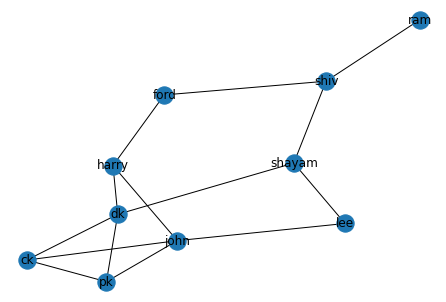

In [10]:
def get_graph(x):
    G= nx.from_pandas_edgelist(x,'FROM','TO',create_using=nx.Graph())
    return G

G = get_graph(train_edges_unique)
nx.draw(G,with_labels =True)

In [11]:
train_edges['WEIGHT']=train_edges.iloc[:,-6:].sum(axis=1)
train_edges['WEIGHT']

0     2
1     6
2     5
3     3
4     4
5     2
6     6
7     6
8     6
9     3
10    4
11    6
12    4
13    6
Name: WEIGHT, dtype: int64

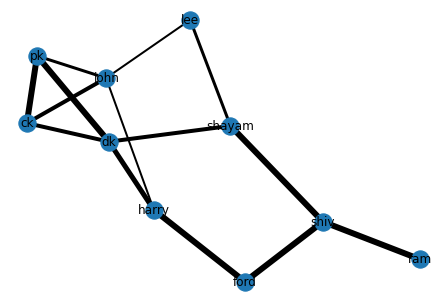

In [12]:
nx.draw(G,with_labels =True,width = train_edges['WEIGHT'])

In [13]:
for i in range(len(list(G.edges()))):
    G[list(G.edges())[i][0]][list(G.edges())[i][1]]['weights'] = train_edges.iloc[i]['WEIGHT']

In [14]:
labels = nx.get_edge_attributes(G, 'weights')
d = dict(G.degree)
labels

{('harry', 'john'): 2,
 ('harry', 'ford'): 6,
 ('harry', 'dk'): 5,
 ('john', 'pk'): 3,
 ('john', 'ck'): 4,
 ('john', 'lee'): 2,
 ('ram', 'shiv'): 6,
 ('shiv', 'ford'): 6,
 ('shiv', 'shayam'): 6,
 ('shayam', 'lee'): 3,
 ('shayam', 'dk'): 4,
 ('dk', 'pk'): 6,
 ('dk', 'ck'): 4,
 ('pk', 'ck'): 6}

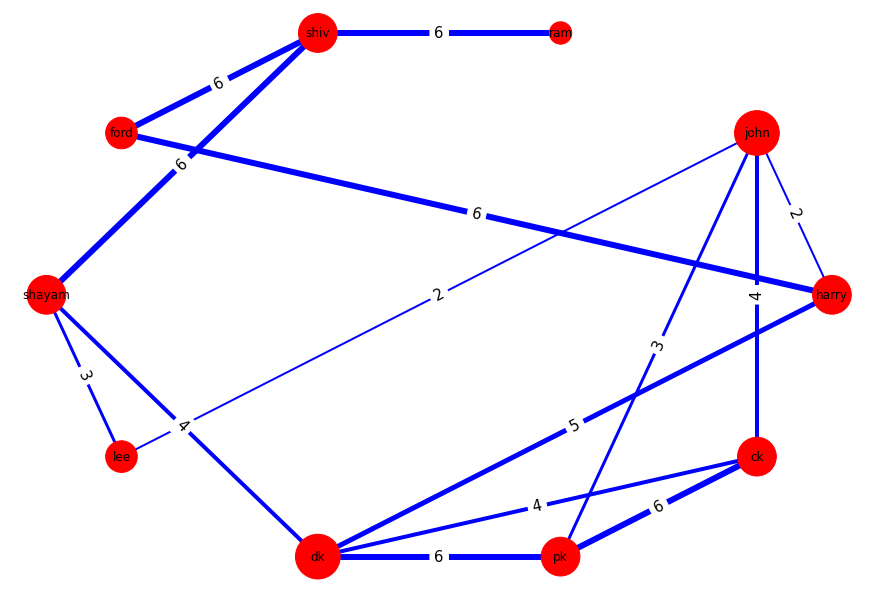

In [15]:
pos = nx.circular_layout(G)
plt.figure(figsize=(12,8))
d = dict(G.degree)
labels = nx.get_edge_attributes(G, 'weights')
weights = [G[u][v]['weights'] for u,v in G.edges()]
nx.draw(G, pos=pos,node_color='red',with_labels=True, node_size=[d[k]*500 for k in d], width=weights, edge_color='b')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_color='black', font_size=15)
plt.show()

In [16]:
nx.closeness_centrality(G)

{'harry': 0.5625,
 'john': 0.5294117647058824,
 'ram': 0.34615384615384615,
 'shiv': 0.5,
 'ford': 0.47368421052631576,
 'shayam': 0.6,
 'lee': 0.5,
 'dk': 0.6,
 'pk': 0.47368421052631576,
 'ck': 0.47368421052631576}

In [17]:
nx.degree_centrality(G)

{'harry': 0.3333333333333333,
 'john': 0.4444444444444444,
 'ram': 0.1111111111111111,
 'shiv': 0.3333333333333333,
 'ford': 0.2222222222222222,
 'shayam': 0.3333333333333333,
 'lee': 0.2222222222222222,
 'dk': 0.4444444444444444,
 'pk': 0.3333333333333333,
 'ck': 0.3333333333333333}

In [18]:
nx.betweenness_centrality(G)

{'harry': 0.16203703703703703,
 'john': 0.15277777777777776,
 'ram': 0.0,
 'shiv': 0.2638888888888889,
 'ford': 0.08333333333333333,
 'shayam': 0.29166666666666663,
 'lee': 0.05555555555555555,
 'dk': 0.25,
 'pk': 0.009259259259259259,
 'ck': 0.009259259259259259}

In [26]:
def small_world(G, seed_value):
    #omega:= Lr/L - C/CL
    omega = round(nx.algorithms.smallworld.omega(G, seed=seed_value))
    print("Obtained value of omega- " +str(omega) +", Guidance: omega ranges between -1 and 1. Values close to 0 means the Gcharacteristics. Value close to -1 means G has few regular patterns shape whereas value close \ to 1 means g is a random graph.")
         
    #sigma: C/Cr / L/Lr
         
    sigma = round(nx.algorithms.smallworld.sigma(G,seed=seed_value))
    print("Obtained value of sigma = " + str(sigma)+", Guidance : a graph is commonly classified as small world if sigma>1")
         
    average_shortest_path_length = []
    for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
          average_shortest_path_length.append(round(nx.average_shortest_path_length(C)))
     
    print("Obtained value of average shortest_path_length = "+ str(average_shortest_path_length))
     
    return omega, sigma, average_shortest_path_length   

In [27]:
seed_value = 123 ; np.random.seed(seed_value)
small_world(G, seed_value)

Obtained value of omega- 0.0, Guidance: omega ranges between -1 and 1. Values close to 0 means the Gcharacteristics. Value close to -1 means G has few regular patterns shape whereas value close \ to 1 means g is a random graph.
Obtained value of sigma = 1.0, Guidance : a graph is commonly classified as small world if sigma>1
Obtained value of average shortest_path_length = [2]


(0.0, 1.0, [2])

In [28]:
shortest_paths = dict(nx.shortest_path_length(G))
node_path_avg = [sum(paths.values()) / len(G.nodes) for node, paths in shortest_paths.items()]
avg_path_length = round(sum(node_path_avg) / len(G.nodes))
avg_path_length

2